### What Is Logistic Regression?
Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help. 

### What Are the Different Types of Logistic Regression?
There are three main types of logistic regression: binary, multinomial and ordinal. They differ in execution and theory. Binary regression deals with two possible classes, essentially: yes or no. Multinomial logistic regression deals with three or more classes. And ordinal logistic regression deals with three or more classes in a predetermined order.

### Binary Logistic Regression
Binary logistic regression in the case of classifying an object as an animal or not an animal—it’s an either/or solution. There are just two possible outcome answers. This concept is typically represented as a 0 or a 1 in coding. Examples include:

* Whether or not to lend to a bank customer (outcomes are yes or no).
* Assessing cancer risk (outcomes are high or low).
* Will a team win tomorrow’s game (outcomes are yes or no).

### Multinomial Logistic Regression
Multinomial logistic regression is a model where there are multiple classes that an item can be classified as. There is a set of three or more predefined classes set up prior to running the model. Examples include:

* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?

### Ordinal Logistic Regression
Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary. Examples include:

* Ranking restaurants on a scale of 0 to 5 stars.
* Predicting the podium results of an Olympic event.
* Assessing a choice of candidates, specifically in places that institute ranked-choice voting.

__The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.__

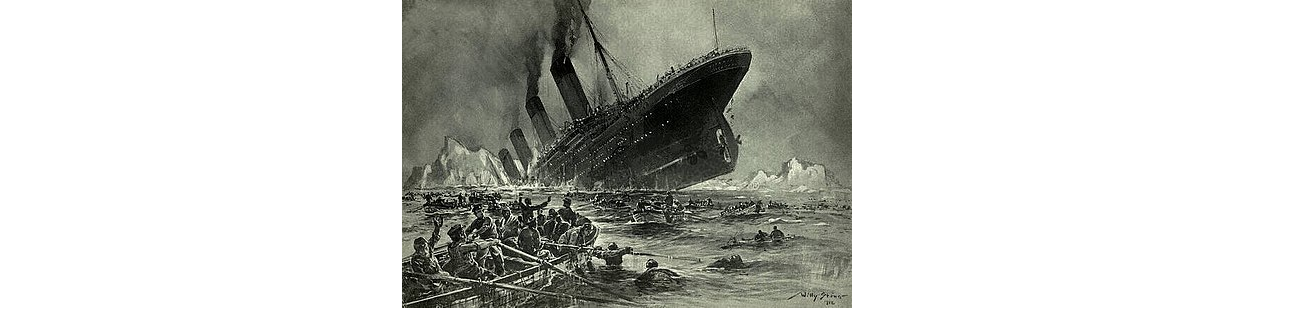
__Source:__ https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

In [228]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df_survive = pd.read_csv('e:/datafile/titanic_survive.csv')
df_gender = pd.read_csv('e:/datafile/titanic_gender.csv')

### Exploring the data

* **PassengerID -** A column added to identify each row and make submissions easier
* **Survived -** Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* **Pclass -** The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* **Name -** The passenger's name
* **Gender -** The passenger's gender
* **Age -** The passenger's age in years
* **SibSp -** The number of siblings or spouses the passenger had aboard the Titanic
* **Parch -** The number of parents or children the passenger had aboard the Titanic
* **Ticket -** The passenger's ticket number
* **Fare -** The fare the passenger paid
* **Cabin -** The passenger's cabin number
* **Embarked -** The port where the passenger embarked (on board) (C=Cherbourg, Q=Queenstown, S=Southampton)

> Reference - https://github.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster

## Case Study - 1 (Survive Prediction Model)

In [230]:
df_survive.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
df_survive.shape

(891, 12)

In [232]:
# Select all the data.
# Go to Home > Conditional Formatting > New rule.
# Click on “Format only cells that contain”
# Change “Cell Value” option to “Blanks”

In [233]:
df_survive.isnull().head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

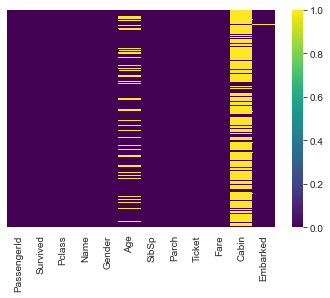

In [234]:
sns.heatmap(df_survive.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
# cbar : boolean, optional: Whether to draw a colorbar.
# new matplotlib default colormap (“viridis”) 

In [235]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:
df_survive.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

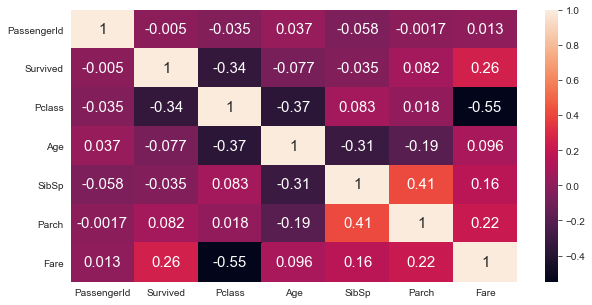

In [237]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_survive.corr(), annot = True, annot_kws = {"size":15})

<AxesSubplot:xlabel='Survived', ylabel='count'>

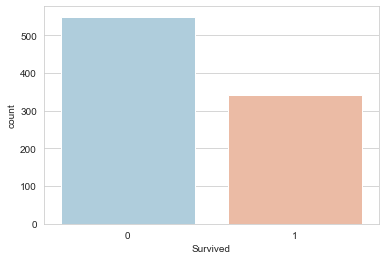

In [238]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df_survive, palette = 'RdBu_r')

In [239]:
print ("0 - Count =", len(df_survive[df_survive.Survived == 0]), end = ", ")
print ("1 - Count =", len(df_survive[df_survive.Survived == 1]), end = ", ")
print ("Total Count =", len(df_survive))

0 - Count = 549, 1 - Count = 342, Total Count = 891


<AxesSubplot:xlabel='Survived', ylabel='count'>

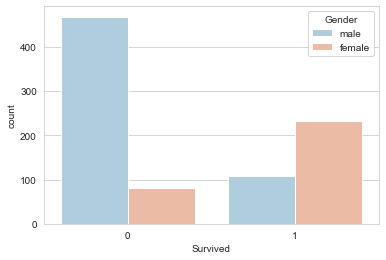

In [240]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Gender', data = df_survive, palette = 'RdBu_r')

In [241]:
print ("0 - Male =", len(df_survive[(df_survive.Survived == 0) & (df_survive.Gender == 'male')]), end = ", ")
print ("0 - Female =", len(df_survive[(df_survive.Survived == 0) & (df_survive.Gender == 'female')]), end = ", ")
print ("1 - Male =", len(df_survive[(df_survive.Survived == 1) & (df_survive.Gender == 'male')]), end = ", ")
print ("1 - Female =", len(df_survive[(df_survive.Survived == 1) & (df_survive.Gender == 'female')]), end = ", ")

0 - Male = 468, 0 - Female = 81, 1 - Male = 109, 1 - Female = 233, 

<AxesSubplot:xlabel='Survived', ylabel='count'>

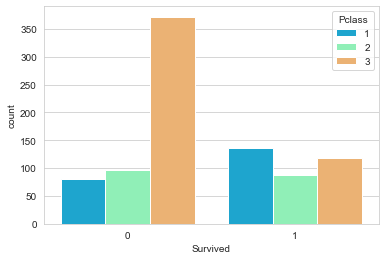

In [242]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_survive, palette = 'rainbow')

In [243]:
print ("0 - Pclass-1 =", len(df_survive[(df_survive.Survived == 0) & (df_survive.Pclass == 1)]), end = ", ")
print ("0 - Pclass-2 =", len(df_survive[(df_survive.Survived == 0) & (df_survive.Pclass == 2)]), end = ", ")
print ("0 - Pclass-3 =", len(df_survive[(df_survive.Survived == 0) & (df_survive.Pclass == 3)]), end = ", ")
print ("1 - Pclass-1 =", len(df_survive[(df_survive.Survived == 1) & (df_survive.Pclass == 1)]), end = ", ")
print ("1 - Pclass-2 =", len(df_survive[(df_survive.Survived == 1) & (df_survive.Pclass == 2)]), end = ", ")
print ("1 - Pclass-3 =", len(df_survive[(df_survive.Survived == 1) & (df_survive.Pclass == 3)]), end = ", ")

0 - Pclass-1 = 80, 0 - Pclass-2 = 97, 0 - Pclass-3 = 372, 1 - Pclass-1 = 136, 1 - Pclass-2 = 87, 1 - Pclass-3 = 119, 

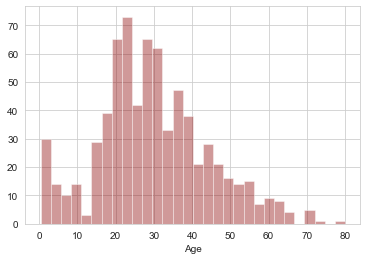

In [244]:
sns.distplot(df_survive['Age'].dropna(), kde = False, color = 'darkred', bins = 30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

<AxesSubplot:xlabel='SibSp', ylabel='count'>

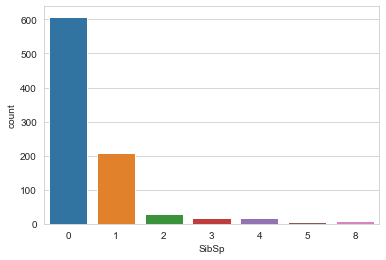

In [245]:
sns.countplot(x = 'SibSp', data = df_survive)

<AxesSubplot:>

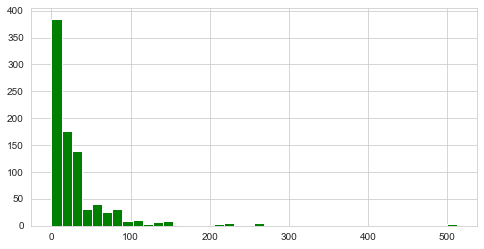

In [246]:
df_survive['Fare'].hist(color = 'green', bins = 40, figsize = (8, 4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

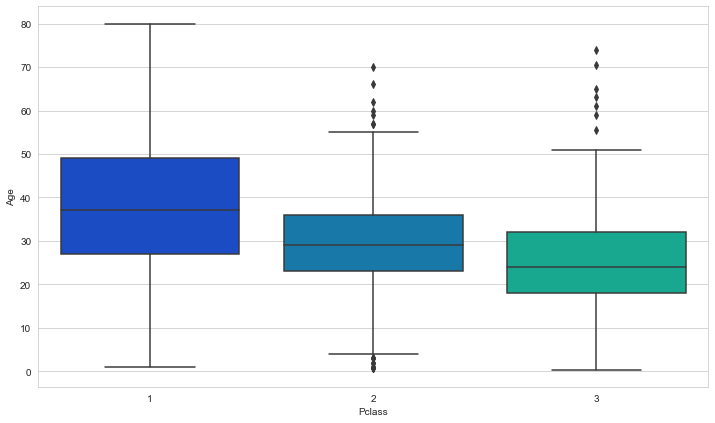

In [247]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df_survive, palette = 'winter')

In [248]:
print ("Median of age for Pclass-1 =", np.median(df_survive[df_survive.Pclass == 1][['Age']].dropna()), end = ", ")
print ("Plass-2 =", np.median(df_survive[df_survive.Pclass == 2][['Age']].dropna()), end = ", ")
print ("and Pclass-3 =", np.median(df_survive[df_survive.Pclass == 3][['Age']].dropna()), end = ", ")

Median of age for Pclass-1 = 37.0, Plass-2 = 29.0, and Pclass-3 = 24.0, 

In [249]:
def impute_age(cols):    # cols is a series object with two labeled values: Age and Pclass with index values 0 and 1 respectively
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37      # Median value for Pclass-1
        elif Pclass == 2: return 29    # Median value for Pclass-2
        else: return 24                # Median value for Pclass-3
    else:
        return Age                     # If Age is not null

In [250]:
df_survive.head(n = 10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [251]:
df_survive['Age'] = df_survive[['Age', 'Pclass']].apply(impute_age, axis = 1)
df_survive.head(n = 10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

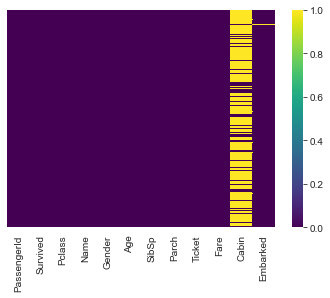

In [252]:
sns.heatmap(df_survive.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [253]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [254]:
df_survive.drop('Cabin', inplace = True, axis = 1)

In [255]:
df_survive.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [256]:
df_survive.shape

(891, 11)

In [257]:
# locating a data point with a null value at Embarked column
print(df_survive[['PassengerId', 'Survived', 'Pclass', 'Embarked']][60:63])
# df_survive.dropna(inplace = True)

print (df_survive.Embarked.value_counts())
most_frequent_value = df_survive.Embarked.mode()[0]
print (f"Most frequent Embarked value is {most_frequent_value}")

# fill null values in Embarked column with the most frequent value of Embarked column
df_survive.Embarked = df_survive.Embarked.fillna(value = most_frequent_value)

print(df_survive[['PassengerId', 'Survived', 'Pclass', 'Embarked']][60:63])

    PassengerId  Survived  Pclass Embarked
60           61         0       3        C
61           62         1       1      NaN
62           63         0       1        S
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Most frequent Embarked value is S
    PassengerId  Survived  Pclass Embarked
60           61         0       3        C
61           62         1       1        S
62           63         0       1        S


In [258]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [259]:
df_survive.shape

(891, 11)

In [260]:
gender = pd.get_dummies(df_survive['Gender'])
gender.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [261]:
# Convert categorical variable into dummy/indicator variables
gender = pd.get_dummies(df_survive['Gender'], drop_first = True)

print(df_survive['Gender'].head())
print("gender -> \n", gender.head())

0      male
1    female
2    female
3    female
4      male
Name: Gender, dtype: object
gender -> 
    male
0     1
1     0
2     0
3     0
4     1


In [262]:
embark = pd.get_dummies(df_survive['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [263]:
# Convert categorical variable into dummy/indicator variables
embark = pd.get_dummies(df_survive['Embarked'], drop_first = True)

print(df_survive['Embarked'].head())
print("embark -> \n",embark.head())

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
embark -> 
    Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [264]:
df_survive.drop(['Gender', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [265]:
df_survive = pd.concat([df_survive, gender, embark], axis = 1)

In [266]:
print (df_survive.shape, type(df_survive))
df_survive.head()

(891, 10) <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [267]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [268]:
# guasian curve means that the predictions are right for the data set

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
x_train, x_test, y_train, y_test = train_test_split(df_survive.drop('Survived', axis = 1), df_survive['Survived'],
                                               test_size = 0.30, random_state = 100)
print("No. of Train rows -> ", y_train.shape, x_train.shape)
print("No. of Test rows -> ", y_test.shape, x_test.shape)

No. of Train rows ->  (623,) (623, 9)
No. of Test rows ->  (268,) (268, 9)


In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
logmodel = LogisticRegression(max_iter = 500)
logmodel

LogisticRegression(max_iter=500)

In [273]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [274]:
predictions = logmodel.predict(x_test)
print (predictions.shape)
predictions

(268,)


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [275]:
from sklearn.metrics import classification_report

In [276]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.67      0.73       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
print(confusion_matrix(y_test, predictions))
# confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Actual Class " + str(class_name) for class_name in [0, 1]])

confusion_df

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

[[141  18]
 [ 36  73]]


,Predicted Class 0,Predicted Class 1
Actual Class 0,141,18
Actual Class 1,36,73


### **Detailed Calculations and Explanations**
* **Precision = TP/(TP + FP)**
* **Recall = TP/(TP + FN)**
* **F1-score = 2 x (precision x recall)/(precision + recall)**

<table border = 3 align = "left">
    <tr><th></th><th>Predicted Class 0</th><th>Predicted Class 1</th></tr>
    <tr align = "right"><th>Actual Class 0</th><td>141</td><td>18</td></tr>
    <tr align = "right"><th>Actual Class 1</th><td>36</td><td>73</td></tr>
</table>

### Classification Report
<pre>
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.67      0.73       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268
</pre>
<pre>
                       precision              recall                      f1-score       support
           0   141/(141+36)=0.80   141/(141+18)=0.89  2*0.80*0.89/(0.80+0.89)=0.84    141+18=159
           1     73/(73+18)=0.80     73/(73+36)=0.67  2*0.80*0.67/(0.80+0.67)=0.73     36+73=109
           
    accuracy                                                                  0.80   159+109=268
   macro avg  (0.80+0.80)/2=0.80  (0.89+0.67)/2=0.78            (0.84+0.73)/2=0.78   159+109=268
weighted avg    (141+73)/(141+18    (141+73)/(141+18  2*0.80*0.80/(0.80+0.80)=0.80   159+109=268
                    +36+73)=0.80        +36+73)=0.80
</pre>


In [279]:
print(logmodel.coef_)    # model parameters

[[-1.06058468e-05 -1.10038787e+00 -3.93668938e-02 -2.70054473e-01
  -2.11078553e-01  2.78920151e-03 -2.71927081e+00 -2.24985444e-01
  -3.17687711e-01]]


In [280]:
print(logmodel.intercept_)    # model parameters

[5.12219907]


## Case Study - 2 (Gender Prediction Model)

In [281]:
df_gender.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

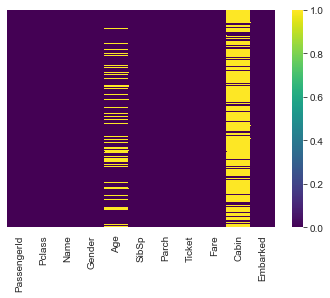

In [282]:
sns.heatmap(df_gender.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [283]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Gender       418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

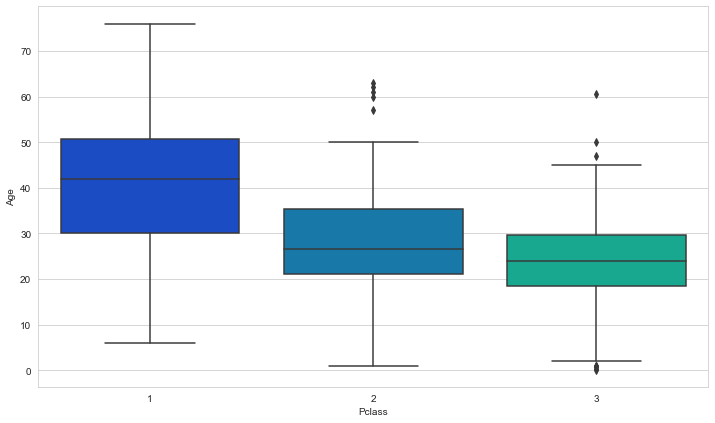

In [284]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df_gender, palette = 'winter')

In [285]:
df_gender['Age'] = df_gender[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

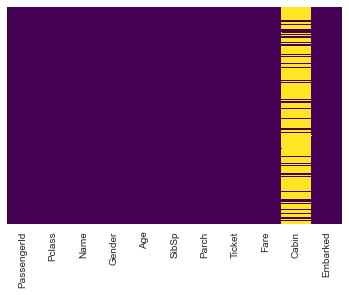

In [286]:
sns.heatmap(df_gender.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [287]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Gender       418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [288]:
df_gender.drop('Cabin', inplace = True, axis = 1)

In [289]:
df_gender.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [290]:
df_gender.dropna(inplace = True)

In [291]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Gender       417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [292]:
gender = pd.get_dummies(df_gender['Gender'], drop_first = True)
embark = pd.get_dummies(df_gender['Embarked'], drop_first = True)

In [293]:
df_gender.drop(['Gender', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [294]:
df_gender=pd.concat([df_gender, gender, embark], axis = 1)

In [295]:
df_gender.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [296]:
x_train, x_test, y_train, y_test = train_test_split(df_gender.drop('male', axis = 1), df_gender['male'], 
                                                    test_size = 0.30, random_state = 101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(291, 8) (126, 8) (291,) (126,)


In [297]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [298]:
predictions = logmodel.predict(x_test)

In [299]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.10      0.16        61
           1       0.52      0.91      0.66        65

    accuracy                           0.52       126
   macro avg       0.51      0.50      0.41       126
weighted avg       0.51      0.52      0.42       126



In [300]:
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])

confusion_df
#                 predicted     
#           class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

,Predicted Class 0,Predicted Class 1
Class 0,6,55
Class 1,6,59


In [301]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)
#                 predicted     
#           class-0      class-1
# class-0   TN (7)       FP (54)  
# class-1   FN (6)       TP (59)
#      precision         recall             f1-score                     support
#   0  7/(7+6)=0.54      7/(7+54)=0.11      2*0.54*0.11/(0.54+0.11)=0.19 7+54=61
#   1  59/(59+54)=0.52   59/(59+6)=0.91     2*0.52*0.91/(0.52+0.91)=0.66 6+59=65
#T/A   (7+59)/(7+54      (7+59)/(7+54       2*0.52*0.52/(0.52+0.52)=0.52 61+65=126
#       +6+59)=0.52       +6+59)=0.52

In [302]:
print(logmodel.coef_)

[[ 4.33494233e-04  2.60813315e-01  1.04185493e-02 -3.67511061e-02
  -3.83205010e-01 -5.59066173e-03 -1.29937754e+00  4.92301534e-02]]


In [303]:
print(logmodel.intercept_)

[-0.07051405]
